In [ ]:
import operator

import matplotlib.pyplot as plt
%matplotlib inline
import re
from collections import defaultdict

import numpy as np

with open('03/input.txt') as f:
    lines = f.readlines()

In [ ]:
part_1 = 0

SIZE = 140


def convert(a):
    if a.isdigit():
        return int(a)
    if a == '.':
        return -50
    return 50


N = np.zeros((SIZE, SIZE))

data = lines[0:SIZE]

for y, line in enumerate(data):
    for x, char in enumerate(line.rstrip()):
        N[y, x] = convert(char)

plt.figure(figsize=(SIZE, SIZE))
plt.imshow(N, cmap='Blues')

for y in range(10):
    for x in range(10):
        if 0 <= N[y, x] < 10:
            plt.text(x, y, str(int(N[y, x])), ha="center", va="center", color="black", size="xx-large")

plt.axis('off')

links = defaultdict(list)

for y, line in enumerate(lines):
    # line.replace('.', ' ')
    str_part_numbers = re.findall(r"\d+", line)
    next_offset = 0
    for num in str_part_numbers:
        part_index = line[next_offset:].index(num) + next_offset
        next_offset = part_index + len(num)
        left = max(0, part_index - 1)
        right = min(SIZE - 1, part_index + len(num) + 1)
        top = max(0, y - 1)
        bottom = min(SIZE - 1, y + 1)
        symbols = set(lines[top][left: right] + line[left: right] + lines[bottom][left: right]) - set('.0123456789')
        if len(symbols) > 0:
            part_1 += int(num)
            if '*' in symbols:
                for _x in range(left, right):
                    for _y in range(top, bottom + 1):
                        if lines[_y][_x] == '*':
                            links[(_x, _y)].append(int(num))

                        char = lines[_y][_x]
                        if char == '.':
                            char = 'X'

                        plt.text(_x, _y, lines[_y][_x], ha="center", va="center", backgroundcolor="pink", color="white",
                                 size="xx-large")

            for x, char in enumerate(num):
                plt.text(part_index + x, y, char, ha="center", va="center", backgroundcolor="gray", color="black",
                         size="xx-large")
        else:
            for x, char in enumerate(num):
                plt.text(part_index + x, y, char, ha="center", va="center", backgroundcolor="red", color="white",
                         size="xx-large")

print(part_1)  # 539590

for link in [link for link in links if len(links[link]) == 2]:
    plt.text(link[0], link[1], '*', ha="center", va="center", backgroundcolor="green", color="black", size="xx-large")

links_parts = [links[link] for link in links if len(links[link]) == 2]
prod_links_parts = [prod[0] * prod[1] for prod in links_parts]

part_2 = sum(prod_links_parts)
print(part_2)
# 78858572 fail

### Day 4

Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11

In [ ]:
with open('04/input.txt') as f:
    lines = f.readlines()

cards = [card.rstrip().split(':')[1].split('|') for card in lines]
copies = [1 for i, _ in enumerate(cards)]

part_1 = 0
for i, card in enumerate(cards):
    win_nums = re.findall(r"\d+", card[0])
    player_nums = re.findall(r"\d+", card[1])
    intersections = list(set(win_nums) & set(player_nums))
    result = 1 if len(intersections) > 0 else 0
    for j, score in enumerate(intersections):
        result = result << 1
        copies[i + j + 1] += copies[i]
    result = result >> 1
    part_1 += result

print('part 1:', part_1)  # 25010

part_2 = sum(copies)
print('part 2:', part_2)  # 9924412

### Day 5

seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4

Seed 79, soil 81, fertilizer 81, water 81, light 74, temperature 78, humidity 78, location 82.
Seed 14, soil 14, fertilizer 53, water 49, light 42, temperature 42, humidity 43, location 43.
Seed 55, soil 57, fertilizer 57, water 53, light 46, temperature 82, humidity 82, location 86.
Seed 13, soil 13, fertilizer 52, water 41, light 34, temperature 34, humidity 35, location 35.

What is the lowest location number that corresponds to any of the initial seed numbers?

In [ ]:
import portion as P

with open('05/input.txt') as f:
    lines = f.readlines()

data = {
    'seeds': [],
    'seed-to-soil map': [],
    'soil-to-fertilizer map': [],
    'fertilizer-to-water map': [],
    'water-to-light map': [],
    'light-to-temperature map': [],
    'temperature-to-humidity map': [],
    'humidity-to-location map': [],
}

states = [s for s in data.keys()]
current_state = None

# parse data
for line in lines:
    line = line.strip()
    if len(line) == 0:
        current_state = None
        continue
    label = line.split(':')[0]
    if label in states:
        current_state = label
        if current_state != 'seeds':
            continue
    match current_state:
        case 'seeds':
            data[current_state] = [int(seed) for seed in line.split(':')[1].strip().split(' ')]
        case _:
            link_info = [int(val) for val in line.strip().split(' ')]
            link_info.append(P.closed(link_info[1], link_info[1] + link_info[2] - 1))
            data[current_state].append(link_info)


def find_min_location(ranges_from):
    for state in states[1:]:
        translated = P.empty()
        for dst, src, r, interval in data[state]:
            intersections = ranges_from & interval
            for intersection in intersections:
                translated |= P.closed(dst + intersection.lower - src, dst + intersection.upper - src)
            ranges_from -= interval
        ranges_from |= translated
    return ranges_from.lower


# Part I
seeds_intervals = P.empty()
for src in data['seeds']:
    seeds_intervals |= P.closed(src, src)

print('Part 1:', find_min_location(seeds_intervals))

# Part II
new_seeds = np.array(data['seeds'])
new_seeds = new_seeds.reshape(-1, 2)

seeds_intervals = P.empty()
for src, r in new_seeds:
    seeds_intervals |= P.closedopen(src, src + r)

print('Part 2:', find_min_location(seeds_intervals))


# Day 6: Wait For It

For example:

```
Time:      7  15   30
Distance:  9  40  200
```

### This document describes three races:

The first race lasts 7 milliseconds. The record distance in this race is 9 millimeters.
The second race lasts 15 milliseconds. The record distance in this race is 40 millimeters.
The third race lasts 30 milliseconds. The record distance in this race is 200 millimeters.

Determine the number of ways you could beat the record in each race.
What do you get if you multiply these numbers together


In [ ]:
import re

with open('06/input.txt') as f:
    lines = f.readlines()

times = [int(num) for num in re.findall(r"\d+", lines[0].split(':')[1])]
dists = [int(num) for num in re.findall(r"\d+", lines[1].split(':')[1])]


def get_ways(total_time, record_distance):
    ways = 0
    bad_time = []
    last_bad_time = None
    for t in range(total_time + 1):
        remaining_time = total_time - t
        distance = t * remaining_time
        if distance > record_distance:
            ways += 1
            if len(bad_time) == 0:
                bad_time.append(last_bad_time + 1)
        else:
            last_bad_time = t
            if len(bad_time) == 1:
                bad_time.append(last_bad_time - 1)

    print(f'ways for time {total_time} is {ways}')
    print('bad', bad_time)
    return ways, bad_time[1] - bad_time[0]


def calc_part_1():
    result = 1
    for total_time, record_distance in zip(times, dists):
        ways, _ = get_ways(total_time, record_distance)
        result *= ways
    return result


print('Part I', calc_part_1())

total_time = int(f'{times[0]}{times[1]}{times[2]}')
total_dist = int(f'{dists[0]}{dists[1]}{dists[2]}')

print(total_time, total_dist)
print('Part II', get_ways(total_time, total_dist))

# 358658


In [ ]:
def load_data(filename):
    with open(filename, 'r') as f:
        times = f.readline().rstrip('\n').split()[1:]
        distances = f.readline().rstrip('\n').split()[1:]
        return list(map(int, times)), list(map(int, distances))


# Part One

times, distances = load_data('06/input.txt')

total = 1


def distance(total_time, button_time):
    speed = button_time
    return (total_time - button_time) * speed


for t, record_distance in zip(times, distances):
    variants = sum(1 for b in range(t + 1) if distance(t, b) > record_distance)
    total *= variants

print(total)

# Part Two

time = int(''.join(map(str, times)))
record_distance = int(''.join(map(str, distances)))


def search(low, high, f):
    while high - low > 1:
        mid = (high + low) // 2
        test = f(mid)
        print('test', high)
        if test > 0:
            low = mid
        else:
            high = mid
    print('low', low, 'high', high)
    return high


def lower_bound(x):
    if distance(time, x) <= record_distance:
        return 1
    if distance(time, x - 1) > record_distance:
        return -1
    return 0


def upper_bound(x):
    if distance(time, x) > record_distance:
        return 1
    if distance(time, x - 1) <= record_distance:
        return -1
    return 0


value_from = search(0, time, lower_bound)
value_to = search(value_from, time, upper_bound)

print(value_to - value_from)


In [ ]:
428268 - 69611

In [ ]:
35865985 - 358659 * 100

In [4]:
from functools import lru_cache
import re
import copy


with open('22/test.txt') as f:
    lines = f.readlines()

outer_x = .5
outer_y = .5
outer_z = 1

x_lim = [float('inf'), float('-inf')]
y_lim = [float('inf'), float('-inf')]
z_lim = [float('inf'), float('-inf')]

bricks = []
total_sub_parts = 0

# parse data
for line in lines:
    x1, y1, z1, x2, y2, z2 = [int(num) for num in re.findall(r"\d+", line)]
    x1 += 5
    y1 += 5
    z1 -= 1
    x2 += 5
    y2 += 5
    z2 -= 1
    brick = []
    if x1 != x2:
        for cx in range(min(x1, x2), max(x1, x2) + 1):
            brick.append([cx, y1, z1])
            total_sub_parts += 1
    elif y1 != y2:
        for cy in range(min(y1, y2), max(y1, y2) + 1):
            brick.append([x1, cy, z1])
            total_sub_parts += 1
    elif z1 != z2:
        for cz in range(min(z1, z2), max(z1, z2) + 1):
            brick.append([x1, y1, cz])
            total_sub_parts += 1
    else:
        brick.append([x1, y1, z1])
        total_sub_parts += 1

    bricks.append(brick)

    x_lim = [min(x_lim[0], x1, x2), max(x_lim[1], x1, x2)]
    y_lim = [min(y_lim[0], y1, y2), max(y_lim[1], y1, y2)]
    z_lim = [min(z_lim[0], z1, z2), max(z_lim[1], z1, z2)]

size_x = x_lim[1] + 5
size_y = y_lim[1] + 5
size_z = z_lim[1] + 1


def can_move_bottom(brick, bricks=bricks):
    for cube in brick:
        bottom_brick = select_brick_by_xyz([cube[0], cube[1], cube[2] - 1], bricks=bricks)
        if bottom_brick and bottom_brick != brick:
            return False
    return True
    

def select_brick_by_xyz(xyz, bricks=bricks):
    for brick in bricks:
        if xyz in brick:
            return brick
    return None


def recalc_bricks(bricks=bricks):
    for level in range(1, z_lim[1] + 1):
        level_bricks = [b for b in bricks if min([c[2] for c in b] + [float('inf')]) == level]
        for brick in level_bricks:
            try:
                while can_move_bottom(brick, bricks=bricks):
                    for cube in brick:
                        if cube[2] - 1 < 0:
                            raise Exception
                        cube[2] -= 1
            except Exception:
                pass

print(f'bricks: {len(bricks)} with total {total_sub_parts} parts')
print('bounds', x_lim, y_lim, z_lim)


source_state = copy.deepcopy(bricks)
recalc_bricks()
target_state = copy.deepcopy(bricks)


bricks: 7 with total 20 parts
bounds [5, 7] [5, 7] [0, 8]


In [5]:
def part_1():
    passed = []
    safely_disintegrated = 0
    for i, brick in enumerate(bricks):
        filtered_bricks = [b for b in bricks if b != brick]
        try:
            for cube in brick:
                top_brick = select_brick_by_xyz([cube[0], cube[1], cube[2] + 1], bricks=filtered_bricks)
                if top_brick is None or top_brick in passed:
                    continue
                passed.append(top_brick)
                if can_move_bottom(top_brick, bricks=filtered_bricks):
                    raise Exception
            safely_disintegrated += 1
        except Exception:
            pass
    
    print('Part I:', safely_disintegrated)

part_1()

Part I: 5


In [6]:
def check(brick_list, level=0, bricks=bricks):
    passed = []
    moved = []
    filtered_bricks = [b for b in bricks if b not in brick_list]
    disintegrated = 0
    
    for brick in brick_list:
        # print('\t'*level, 'brick', brick, len(filtered_bricks))
        for cube in brick:
            top_brick = select_brick_by_xyz([cube[0], cube[1], cube[2] + 1], bricks=filtered_bricks)
            if top_brick is None or top_brick in passed:
                continue
            passed.append(top_brick)
            # print('\t'*(level+1), 'can move', top_brick, can_move_bottom(top_brick, bricks=filtered_bricks))
            if can_move_bottom(top_brick, bricks=filtered_bricks):
                moved.append(top_brick)
                disintegrated += 1
    if len(moved) > 0:
        disintegrated += check(moved, level + 1, filtered_bricks)
    # print('\t'*(level+1), 'disintegrated', disintegrated, brick)
    return disintegrated


def part_2():
    disintegrated = 0
    for brick in bricks:
        disintegrated += check([brick])
    print('Part II:', disintegrated)

part_2()

Part II: 7


<IPython.core.display.Javascript object>


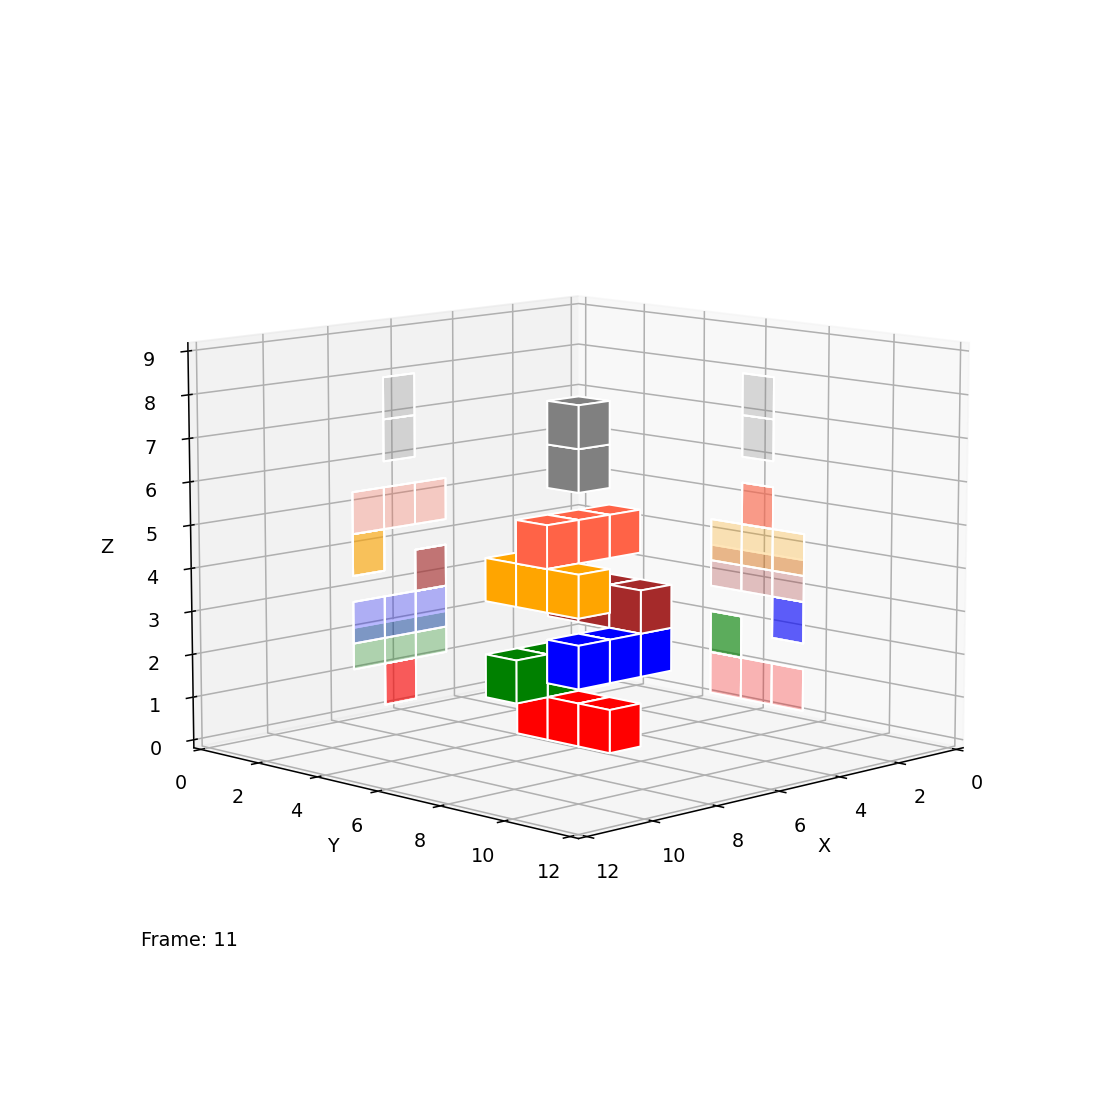

In [122]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from collections import defaultdict

%matplotlib notebook


def get_cube(x1, y1, z1, x2, y2, z2):
    vertices = np.array([
        [x1-outer_x, y1-outer_y, z1],
        [x2+outer_x, y1-outer_y, z1],
        [x2+outer_x, y2+outer_y, z1],
        [x1-outer_x, y2+outer_y, z1],
        [x1-outer_x, y1-outer_y, z2+outer_z],
        [x2+outer_x, y1-outer_y, z2+outer_z],
        [x2+outer_x, y2+outer_y, z2+outer_z],
        [x1-outer_x, y2+outer_y, z2+outer_z],
    ])
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[0], vertices[3], vertices[7], vertices[4]],
    ]
    return faces

def get_x_projection(x1, y1, z1, x2, y2, z2):
    vertices = [
        [0, y1-outer_y, z1],
        [0, y1-outer_y, z1],
        [0, y2+outer_y, z1],
        [0, y2+outer_y, z1],
        [0, y1-outer_y, z2+outer_z],
        [0, y1-outer_y, z2+outer_z],
        [0, y2+outer_y, z2+outer_z],
        [0, y2+outer_y, z2+outer_z],
    ]
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[0], vertices[3], vertices[7], vertices[4]],
    ]
    return faces

def get_y_projection(x1, y1, z1, x2, y2, z2):
    vertices = [
        [x1-outer_x, 0, z1],
        [x2+outer_x, 0, z1],
        [x2+outer_x, 0, z1],
        [x1-outer_x, 0, z1],
        [x1-outer_x, 0, z2+outer_z],
        [x2+outer_x, 0, z2+outer_z],
        [x2+outer_x, 0, z2+outer_z],
        [x1-outer_x, 0, z2+outer_z],
    ]
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[0], vertices[3], vertices[7], vertices[4]],
    ]
    return faces



def settings(ax):
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, size_x])
    ax.set_ylim([0, size_y])
    ax.set_zlim([0, size_z])
    ax.set_box_aspect([np.ptp(coord) for coord in [ax.get_xlim(), ax.get_ylim(), ax.get_zlim()]])

bricks = copy.deepcopy(source_state)


fig, axs = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': '3d'})

c = ['r', 'g', 'b', 'brown', 'orange', 'tomato', 'gray']

cubes = []
color = -1
transitions = defaultdict(list)

for brick, target in zip(source_state, target_state):
    frame = 0
    color = (color + 1) % len(c)
    for cube, target_cube in zip(brick, target):
        x1, y1, z1 = cube
        x2, y2, z2 = target_cube

        faces = get_cube(x1, y1, z1, x1, y1, z1)
        cube = Poly3DCollection(faces, color=c[color], edgecolor='white', alpha=1, zorder=0.95)
        axs.add_collection3d(cube)
        t.append(cube)
        if cube != target_cube:
            t_faces = get_cube(x2, y2, z2, x2, y2, z2)
            for i, offset in enumerate(np.linspace(z1, z2, 30)):
                new_faces = get_cube(x2, y2, offset, x2, y2, offset)
                transitions[frame+i].append([cube, new_faces])
    
        faces = get_x_projection(x1, y1, z1, x1, y1, z1)
        cube = Poly3DCollection(faces, color=c[color], edgecolor='white', alpha=0.15, zorder=0)
        axs.add_collection3d(cube)
        if cube != target_cube:
            t_faces = get_x_projection(x2, y2, z2, x2, y2, z2)
            for i, offset in enumerate(np.linspace(z1, z2, 30)):
                new_faces = get_x_projection(x2, y2, offset, x2, y2, offset)
                transitions[frame+i].append([cube, new_faces])

        faces = get_y_projection(x1, y1, z1, x1, y1, z1)
        t_faces = get_y_projection(x2, y2, z2, x2, y2, z2)
        cube = Poly3DCollection(faces, color=c[color], edgecolor='white', alpha=0.15, zorder=0)
        axs.add_collection3d(cube)
        if cube != target_cube:
            t_faces = get_y_projection(x2, y2, z2, x2, y2, z2)
            for i, offset in enumerate(np.linspace(z1, z2, 30)):
                new_faces = get_y_projection(x2, y2, offset, x2, y2, offset)
                transitions[frame+i].append([cube, new_faces])

                
text = axs.text(10, 10, 10, 'test', transform=axs.transAxes)

axs.view_init(elev=10, azim=45)
settings(axs)

def update(frame):
    objects = []
    cubes = transitions[frame]
    for data in cubes:
        cube, faces = data
        cube.set_verts(faces)
        objects.append(cube)
    text.set_text(f'Frame: {frame}')
    objects.append(text)
    axs.autoscale_view()
    return objects


animation = FuncAnimation(fig, update, frames=transitions.keys(), interval=32, blit=True)
plt.show()
